## Домашнее задание к занятию №10 от 05.09.2019 г. «Визуализация данных в Python»
ФИО: Кривова Татьяна Сергеевна

**Задание**. Построить 5 графиков по выбранным данным. Графики должны быть различных видов и использовать хотя бы 2 из рассмотренных на занятии библиотек.

Для каждого описать, какого типа переменные участвуют в визуализации, какова её цель (например, посмотреть на корреляцию двух величин или на распределение значений) и почему выбрали именно такой тип графика.

In [1]:
# 1. Посмотреть на динамику инфляции в России по годам за последние 20 лет (с 1999 по 2018 гг.), ее среднее значение и 
# средние значения за 4-х летние периоды.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pylab import rcParams
rcParams['figure.figsize'] = 15,7

In [3]:
inflation_year_rus = pd.read_csv('russia.inflation.monthly-year-over-year (statbureau.org).csv')

raw_data1 = inflation_year_rus[['Год',' Всего']].rename(columns={'Год': 'Year',\
                ' Всего':'Total_inflation'}).sort_values('Year')

In [4]:
# Подготовка данных для первого графика, вычисляю среднее значение за все годы
data_for_graph1 = raw_data1[(raw_data1.Year > 1998) & (raw_data1.Year != 2019)].reset_index(drop=True)

data_for_graph1.loc[:, 'avgs_total'] = [data_for_graph1['Total_inflation'].mean() for _ in range(20)]

In [5]:
# Вычисляю средние значения за 4-х летние периоды
counter, summ = 0, 0
nums = [idx for idx in data_for_graph1.index]
avg_4_years = []
index_list = [index for index in nums if not (index+1) % 4]

for number in data_for_graph1['Total_inflation'].values:
    summ += number
    counter +=1
    if not counter % 4: 
        avg_4_years.append(round(summ/4, 2))
        summ = 0

<BarContainer object of 20 artists>

Text(0.5, 1.0, 'График 1. Годовая инфляция в России в 1999 – 2018 гг. (statbureau.org)')

Text(0.5, 0, 'Уровень инфляции, %')

(0, 25)

Text(11, 19.3, '11.627 %')

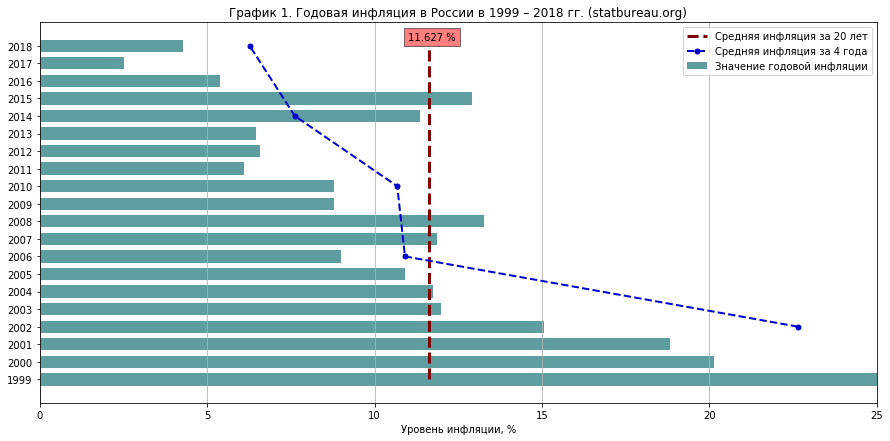

In [9]:
# Для сравнения элементов по годам использую столбчатую горизонтальную диаграмму и для наглядности два линейных графика

plt.barh(nums, data_for_graph1['Total_inflation'], height=0.7,\
         tick_label=data_for_graph1['Year'], color="cadetblue", label='Значение годовой инфляции')

plt.plot(data_for_graph1['avgs_total'], nums, linestyle="dashed",\
         color="maroon", linewidth=3, label='Средняя инфляция за 20 лет')

plt.plot(avg_4_years, index_list, linestyle="dashed",\
         linewidth=2, marker="o", markersize=5, color="mediumblue", label='Средняя инфляция за 4 года')

plt.title('График 1. Годовая инфляция в России в 1999 – 2018 гг. (statbureau.org)')
plt.grid(axis='x')
plt.legend()
plt.xlabel('Уровень инфляции, %')
plt.xlim(0,25)

plt.text(11, 19.3, '11.627 %', bbox=dict(facecolor='red', alpha=0.5))

In [10]:
# 2. Сравнить инфляцию в США и в Еврозоне по годам за последние 20 лет (с 1999 по 2018 гг.)

In [11]:
# Подготовка данных для второго графика, вычисляю среднее значение за все годы
inflation_year_usa = pd.read_csv('united-states.inflation.monthly-year-over-year (statbureau.org).csv')
inflation_year_euro = pd.read_csv('eurozone.inflation.monthly-year-over-year (statbureau.org).csv')

usa_data = inflation_year_usa[['Год',' Всего']].rename(columns={'Год': 'Year',\
                ' Всего':'Total_inflation_USA'}).sort_values('Year')
euro_data = inflation_year_euro[['Год',' Всего']].rename(columns={'Год': 'Year',\
                ' Всего':'Total_inflation_EURO'}).sort_values('Year')

data_for_graph2 = usa_data[ (usa_data.Year > 1998) ].merge(euro_data[ (euro_data.Year > 1998) ],\
                                                           on='Year', how='left').reset_index(drop=True)

data_for_graph2.loc[:, 'avg_usa'] = [data_for_graph2['Total_inflation_USA'].mean() for _ in range(20)]
data_for_graph2.loc[:, 'avg_euro'] = [data_for_graph2['Total_inflation_EURO'].mean() for _ in range(20)]

nums = [idx for idx in data_for_graph2.index]

<BarContainer object of 20 artists>

<BarContainer object of 20 artists>

(-0.5, 19.5)

(-0.25, 4.25)

Text(0.5, 1.0, 'График 2. Годовая инфляция в США и Еврозоне в 1999 – 2018 гг. (statbureau.org)')

Text(0, 0.5, 'Уровень инфляции, %')

Text(15, 2.3, '2.16 %')

Text(15, 1.5, '1.74 %')

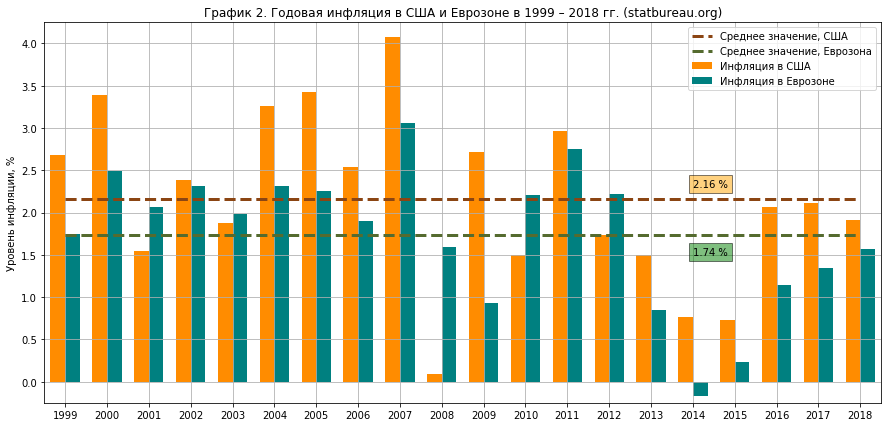

In [12]:
# Для сравнения элементов по годам использую столбчатую вертикальную диаграмму и для наглядности два линейных графика
plt.bar(nums, data_for_graph2['Total_inflation_USA'], width=-0.35, align='edge', tick_label=data_for_graph2['Year'],\
        color="darkorange", label='Инфляция в США')

plt.bar(nums, data_for_graph2['Total_inflation_EURO'], width=0.35, align='edge', tick_label=data_for_graph2['Year'],\
        color="teal", label='Инфляция в Еврозоне')

plt.xlim(-0.5,19.5)
plt.ylim(-0.25,4.25)

plt.plot(nums, data_for_graph2['avg_usa'], linestyle="dashed",\
         color="saddlebrown", linewidth=3, label='Среднее значение, США')

plt.plot(nums, data_for_graph2['avg_euro'], linestyle="dashed",\
         color="darkolivegreen", linewidth=3, label='Среднее значение, Еврозона')


plt.title('График 2. Годовая инфляция в США и Еврозоне в 1999 – 2018 гг. (statbureau.org)')
plt.grid()
plt.legend()
plt.ylabel('Уровень инфляции, %')

plt.text(15, 2.3, '2.16 %', bbox=dict(facecolor='orange', alpha=0.5))
plt.text(15, 1.5, '1.74 %', bbox=dict(facecolor='green', alpha=0.5))

In [13]:
# 3. Посмотреть, что происходило с курсами валют по годам за последние 20 лет (с 1999 по 2019 гг.)
# Строю диаграммы размаха (ящик с усами) для доллара США, евро и швейцарского франка по полным данным ЦБ РФ.  

ratings = pd.read_excel('usd_euro_chf (cbr.ru).xlsx')

Text(0.5, 1.0, 'График 3. Изменение курса доллара США (cbr.ru)')

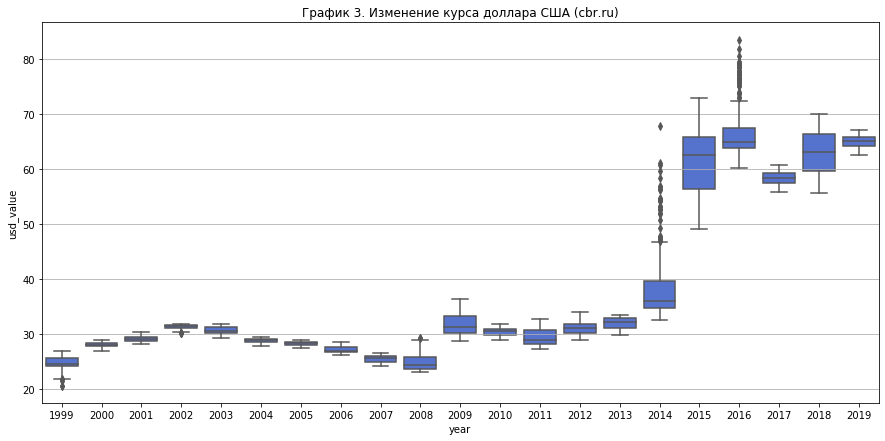

In [14]:
sns.boxplot(x="year", y="usd_value", data=ratings, color="royalblue")

plt.title('График 3. Изменение курса доллара США (cbr.ru)')
plt.grid(axis='y')

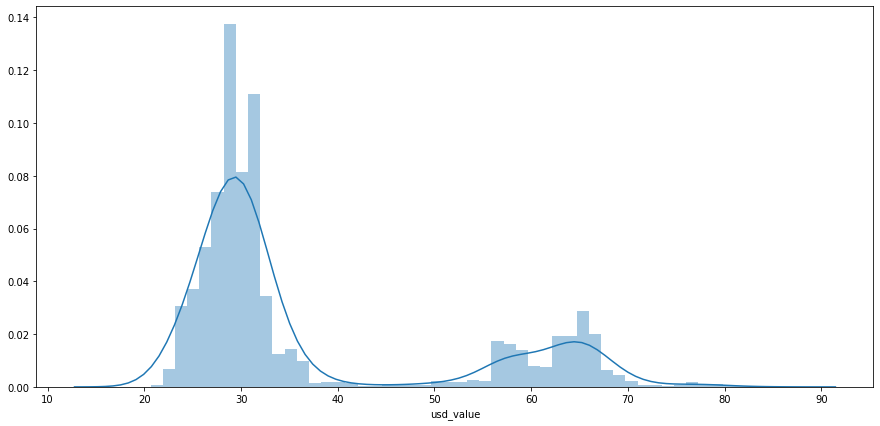

In [15]:
# Смотрю распределение цены доллара
sns.distplot(ratings.usd_value)

Text(0.5, 1.0, 'Изменение курса евро (cbr.ru)')

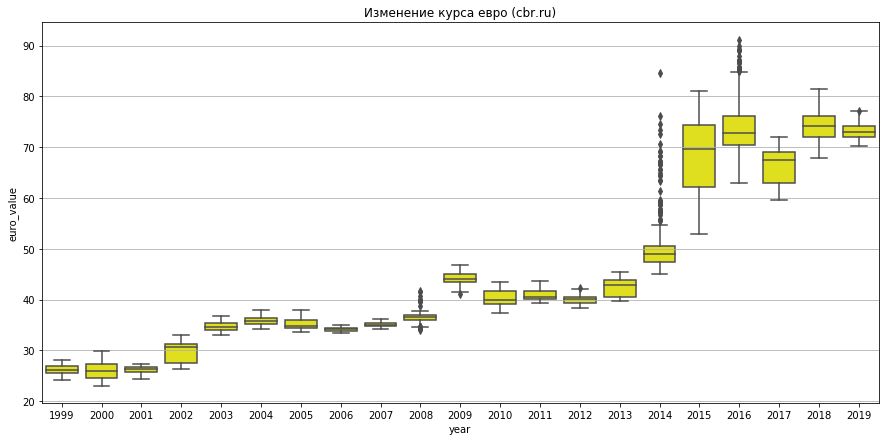

In [16]:
sns.boxplot(x="year", y="euro_value", data=ratings, color="yellow")

plt.title('Изменение курса евро (cbr.ru)')
plt.grid(axis='y')

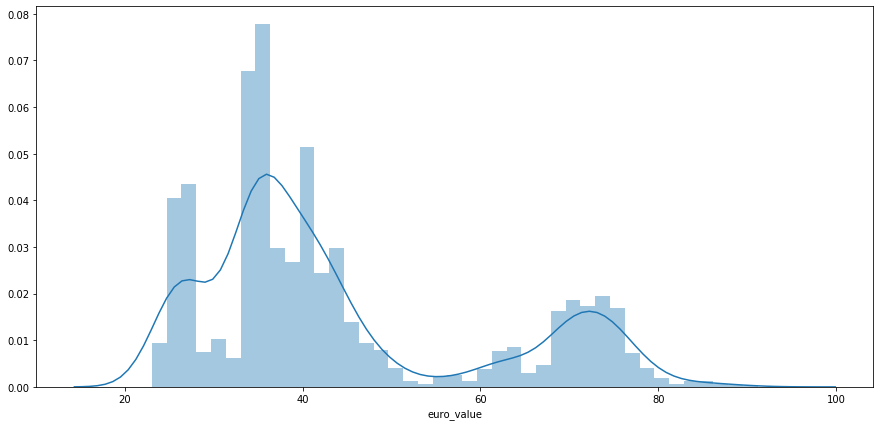

In [17]:
# Смотрю распределение цены евро
sns.distplot(ratings.euro_value)

Text(0.5, 1.0, 'Изменение курса швейцарского франка (cbr.ru)')

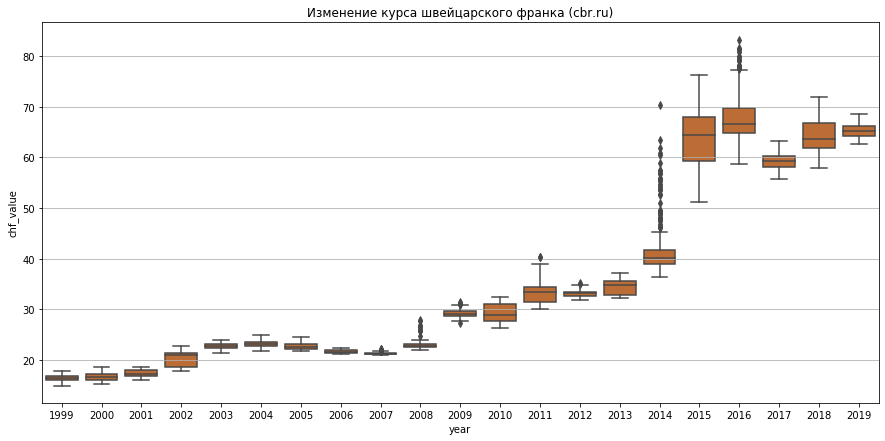

In [18]:
sns.boxplot(x="year", y="chf_value", data=ratings, color="chocolate")

plt.title('Изменение курса швейцарского франка (cbr.ru)')
plt.grid(axis='y')

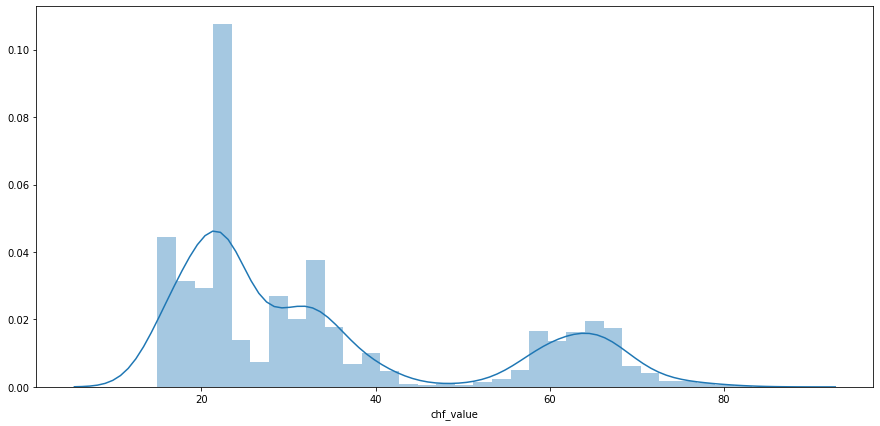

In [19]:
# Смотрю распределение цены швейцарского франка
sns.distplot(ratings.chf_value)

In [20]:
# 4. Из данных ЦБ РФ по курсам валют оставляю ежеквартальные значения - на конец марта, июня, сентября и декабря
# за последние 15 лет (с 31 марта 2005 г. по 30 июня 2019 г.)

# Строю линейный график, violin plot и попарное сравнение.

quarter = pd.read_excel('quarter_data (cbr.ru).xlsx')

E:\Python_programming\Tatiana Python2_Specialist_30-07-2019\python-29-07\python\lib\site-packages\pandas\plotting\_matplotlib\converter.py:102: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


(14, 94)

Text(0.5, 1.0, 'График 4. Ежеквартальная динамика курсов валют с 2005 г. (cbr.ru)')

Text(0, 0.5, 'Рублей')

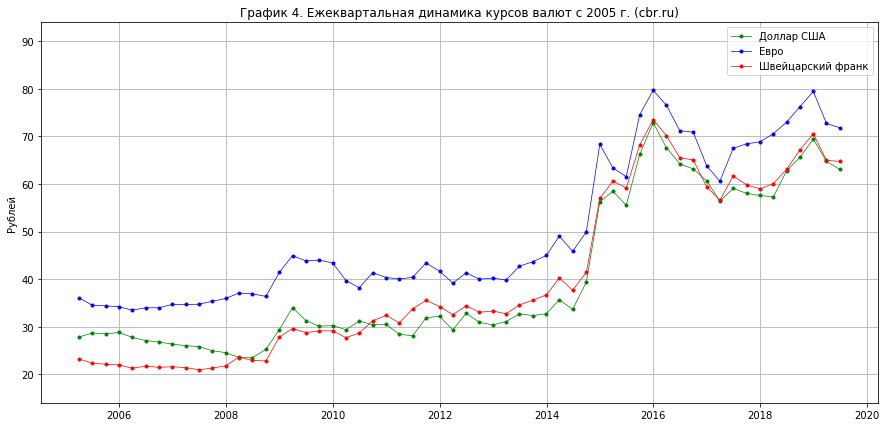

In [21]:
x = quarter.date
plt.plot(x, quarter.usd_value, color="green", marker="o", markersize=3, linewidth=0.7, label='Доллар США')
plt.plot(x, quarter.euro_value, color="blue", marker="o", markersize=3, linewidth=0.7, label='Евро')
plt.plot(x, quarter.chf_value, color="red", marker="o", markersize=3, linewidth=0.7, label='Швейцарский франк')

plt.ylim(14,94)

plt.title('График 4. Ежеквартальная динамика курсов валют с 2005 г. (cbr.ru)')
plt.grid()
plt.legend()
plt.ylabel('Рублей')

([<matplotlib.axis.YTick at 0xb856150>,
 <a list of 20 Text yticklabel objects>)

Text(0.5, 1.0, 'Ежеквартальные значения курсов валют с 2005 г. (cbr.ru)')

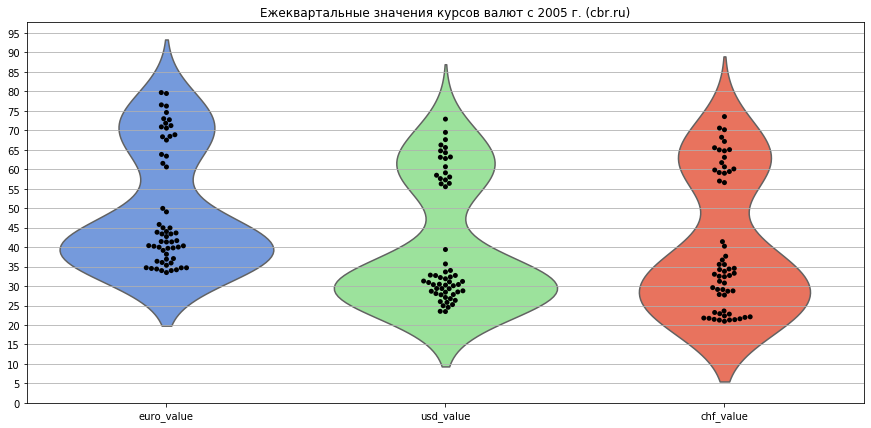

In [22]:
currency_colors = ['cornflowerblue', 'lightgreen', 'tomato']

sns.violinplot(data=quarter[['usd_value', 'euro_value', 'chf_value']], order=['euro_value', 'usd_value', 'chf_value'],\
               inner=None, palette=currency_colors)
sns.swarmplot(data=quarter[['usd_value', 'euro_value', 'chf_value']], order=['euro_value', 'usd_value', 'chf_value'],\
              color='black')

plt.grid(axis='y')
plt.yticks(range(0, 100, 5))
plt.title('Ежеквартальные значения курсов валют с 2005 г. (cbr.ru)')

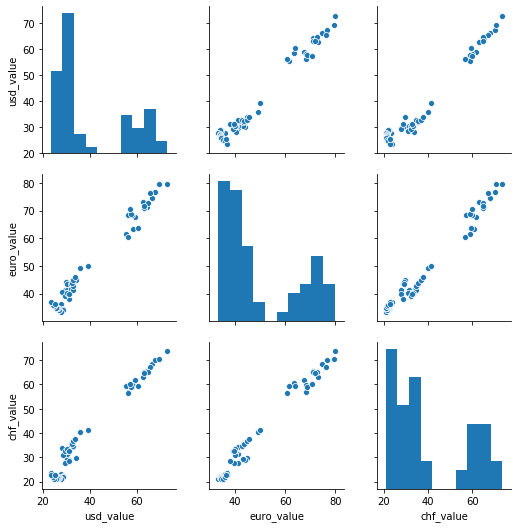

In [23]:
sns.pairplot(quarter[['usd_value', 'euro_value', 'chf_value']])

In [25]:
# 5. Посмотреть ежеквартальные значения курса акций Сургутнефтегаз-п (SNGS_p) и Сбербанк-п (SBER_p)
# за последние 15 лет (с 31 марта 2005 г. по 30 июня 2019 г.) в рублях и долларах.

# Определить корреляцию с курсом доллара.

quotes = pd.read_excel('quotes(cbr.ru_investing.com).xlsx')

In [26]:
quotes.info()
quotes.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 7 columns):
date          58 non-null datetime64[ns]
year          58 non-null int64
usd_value     58 non-null float64
SNGS_p        58 non-null float64
SNGS_p_USD    58 non-null float64
SBER_p        58 non-null float64
SBER_p_USD    58 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 3.2 KB


,date,year,usd_value,SNGS_p,SNGS_p_USD,SBER_p,SBER_p_USD
0,2005-03-31,2005,27.8256,16.500,0.592979,8.49,0.305115
1,2005-06-30,2005,28.6721,16.497,0.575368,11.75,0.409806
2,2005-09-30,2005,28.4989,24.700,0.866700,19.57,0.686693
3,2005-12-31,2005,28.7825,25.840,0.897768,31.80,1.104838
4,2006-03-31,2006,27.7626,32.320,1.164156,36.25,1.305713


([<matplotlib.axis.YTick at 0xd75ab50>,
 <a list of 10 Text yticklabel objects>)

Text(0.5, 1.0, 'График 5. Ежеквартальные значения курсов акций с 2005 г. (investing.com)')

Text(0, 0.5, 'Рублей')

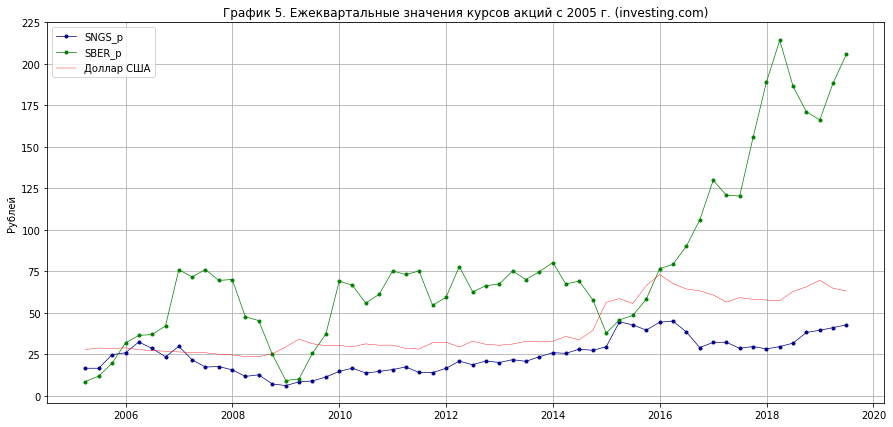

In [27]:
x = quotes.date
plt.plot(x, quotes.SNGS_p, color="darkblue", marker="o", markersize=3, linewidth=0.7, label='SNGS_p')
plt.plot(x, quotes.SBER_p, color="green", marker="o", markersize=3, linewidth=0.7, label='SBER_p')
plt.plot(x, quotes.usd_value, color="red", linewidth=0.4, label='Доллар США')

plt.grid()
plt.yticks(range(0, 250, 25))
plt.title('График 5. Ежеквартальные значения курсов акций с 2005 г. (investing.com)')
plt.legend()
plt.ylabel('Рублей')

Text(0.5, 1.0, 'Ежеквартальные значения курсов акций с 2005 г. в долларах')

Text(0, 0.5, 'Долларов США')

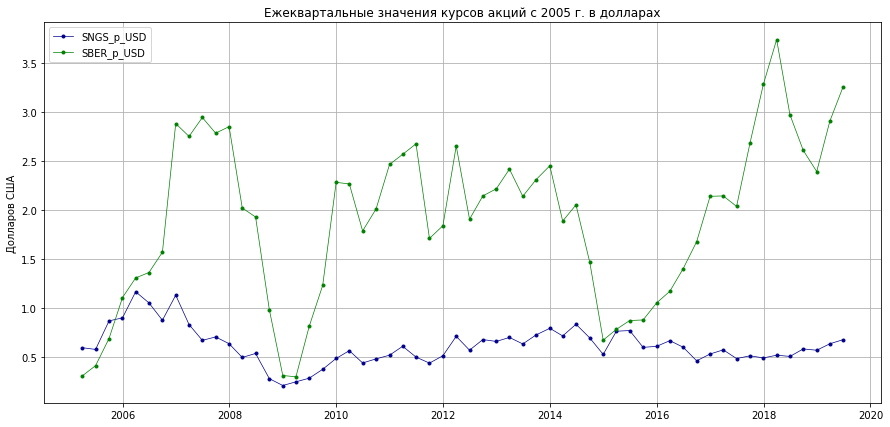

In [28]:
x = quotes.date
plt.plot(x, quotes.SNGS_p_USD, color="darkblue", marker="o", markersize=3, linewidth=0.7, label='SNGS_p_USD')
plt.plot(x, quotes.SBER_p_USD, color="green", marker="o", markersize=3, linewidth=0.7, label='SBER_p_USD')

plt.grid()
plt.title('Ежеквартальные значения курсов акций с 2005 г. в долларах')
plt.legend()
plt.ylabel('Долларов США')

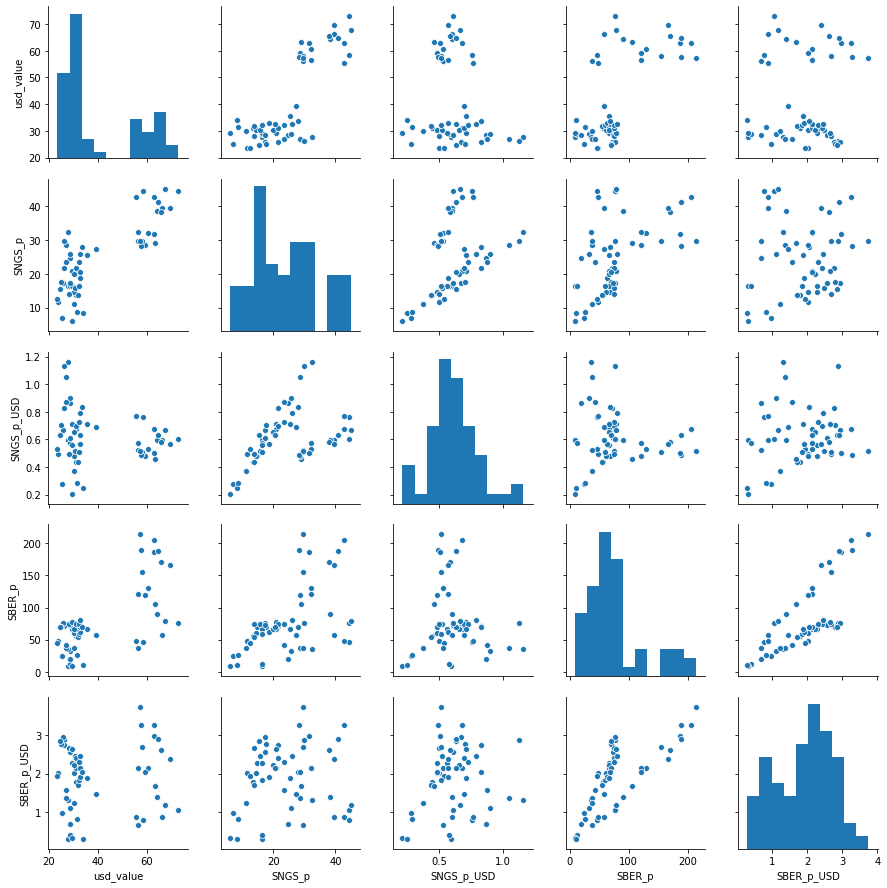

In [29]:
data=quotes[['usd_value', 'SNGS_p', 'SNGS_p_USD', 'SBER_p', 'SBER_p_USD']]
sns.pairplot(data)

E:\Python_programming\Tatiana Python2_Specialist_30-07-2019\python-29-07\python\lib\site-packages\seaborn\matrix.py:268: PendingDeprecationWarning: 
The label function will be deprecated in a future version. Use Tick.label1 instead.
  fontsize = tick.label.get_size()
E:\Python_programming\Tatiana Python2_Specialist_30-07-2019\python-29-07\python\lib\site-packages\seaborn\matrix.py:268: PendingDeprecationWarning: 
The label function will be deprecated in a future version. Use Tick.label1 instead.
  fontsize = tick.label.get_size()


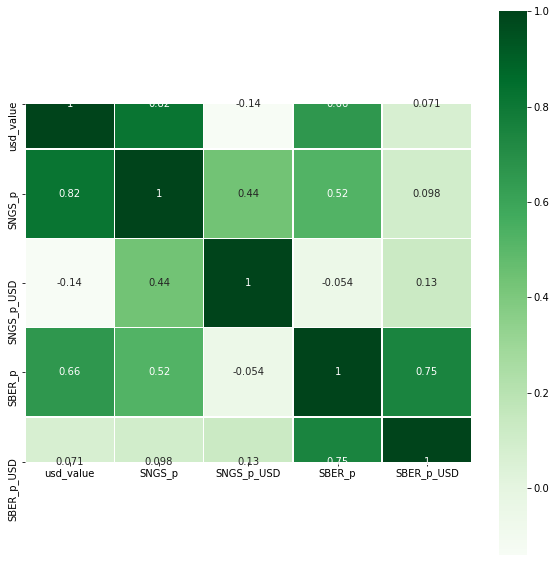

In [30]:
rcParams['figure.figsize'] = 10,10

correlations = data.corr()
sns.heatmap(correlations, annot=True,linewidths=.5, square=True, cmap="Greens")